In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    


In [3]:
import pandas as pd
df_all = pd.read_csv('df_all_processed.csv')

In [4]:
df_all.head()

,Unnamed: 0,Id,drugName,condition,review,rating,date,usefulCount,month,year,review_clean,condition_label,day
0,0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,2012-02-28,22,2,2012,tri antidepress year citalopram fluoxetin amit...,273,28
1,1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,2009-05-17,17,5,2009,son crohn diseas done well asacol no complaint...,253,17
2,2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29,3,9,2017,quick reduct symptom,847,29
3,3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05,35,3,2017,contrav combin drug use alcohol smoke opioid c...,869,5
4,4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22,4,10,2015,birth control one cycl read review type simila...,175,22


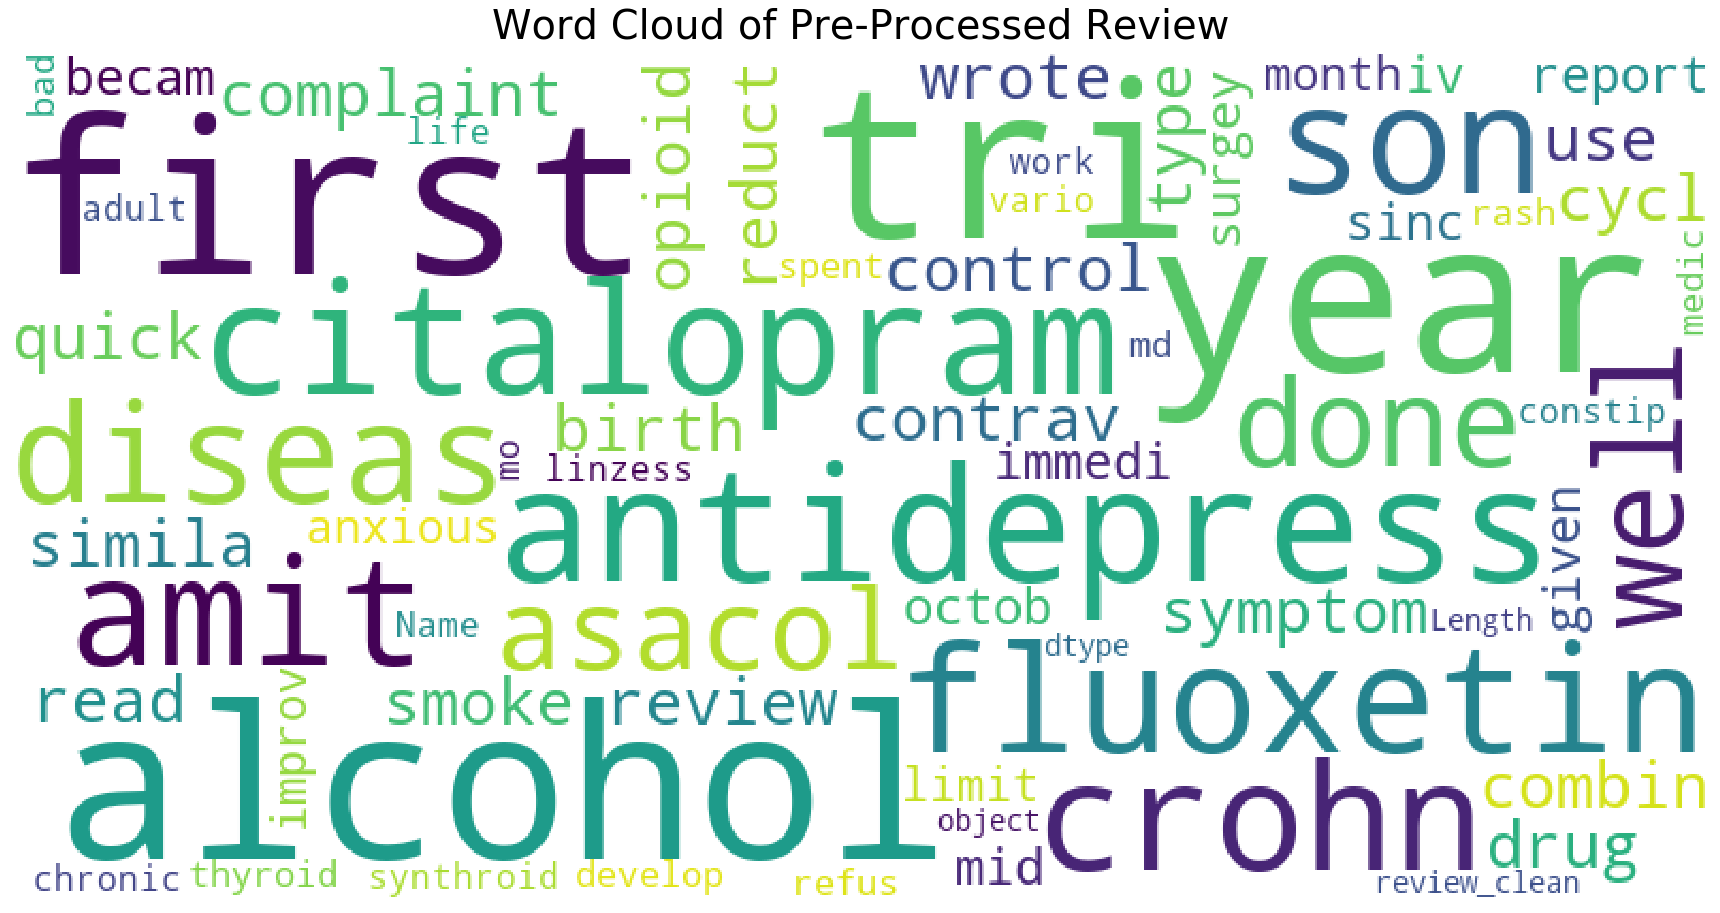

In [10]:
plot_wordcloud(df_all["review_clean"], title="Word Cloud of Pre-Processed Review")

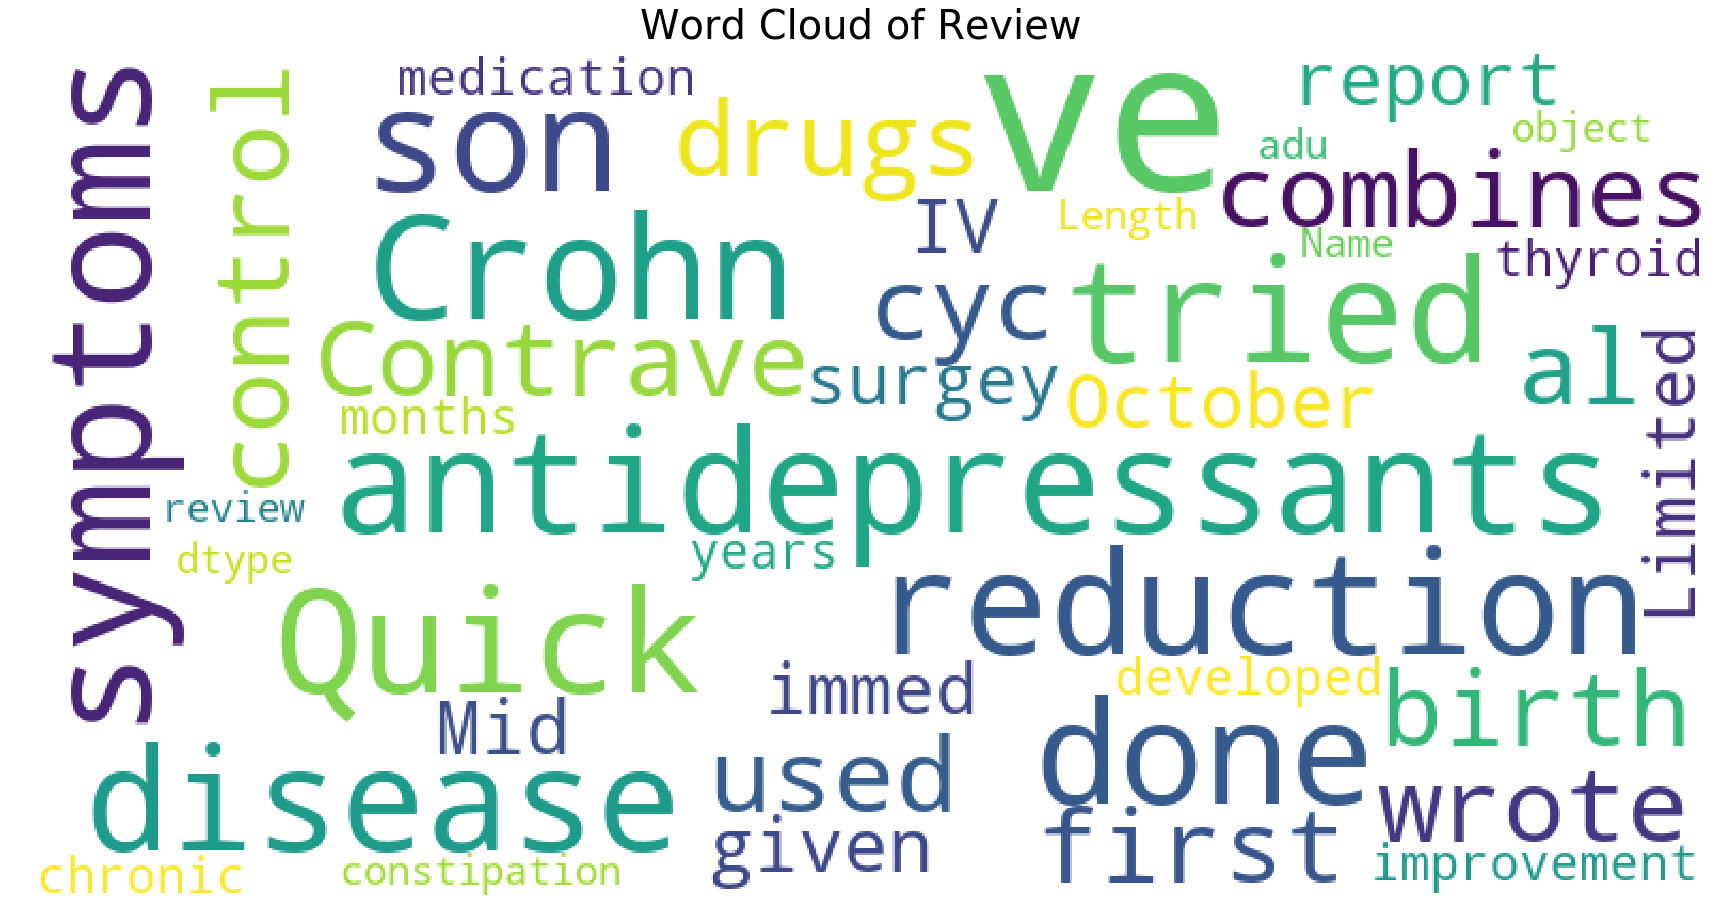

In [11]:
plot_wordcloud(df_all["review"], title="Word Cloud of Review")